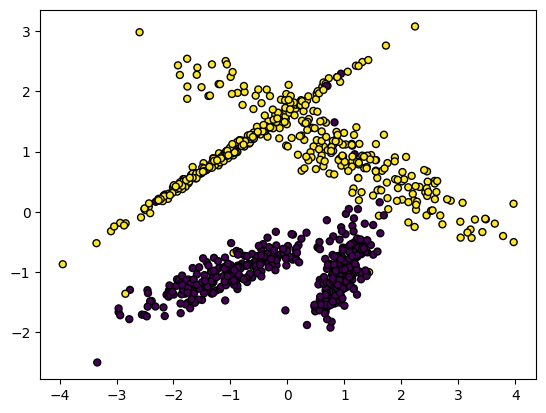

In [149]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


data1, data1_y = make_classification(n_samples=923, n_classes=2, n_features=2, n_redundant=0,
                                      n_clusters_per_class=2,  random_state=110)
plt.scatter(data1[:, 0], data1[:, 1], marker="o", c=data1_y, s=25, edgecolor="k")
plt.show()

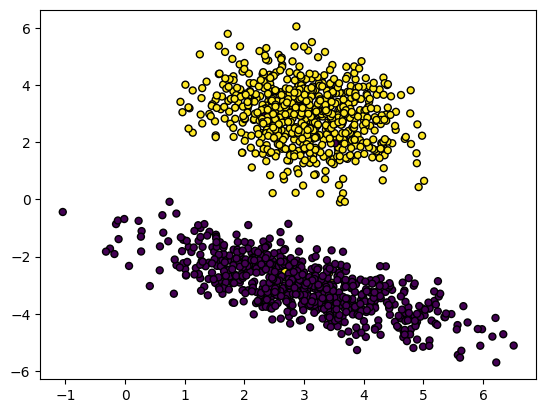

In [150]:
data2, data2_y = make_classification(n_samples=1400, n_classes=2, n_features=2, n_informative=2, 
                           n_redundant=0, class_sep = 3,random_state=0,
                           flip_y=0.01, n_clusters_per_class=1)
plt.scatter(data2[:, 0], data2[:, 1], marker="o", c=data2_y, s=25, edgecolor="k")
plt.show()

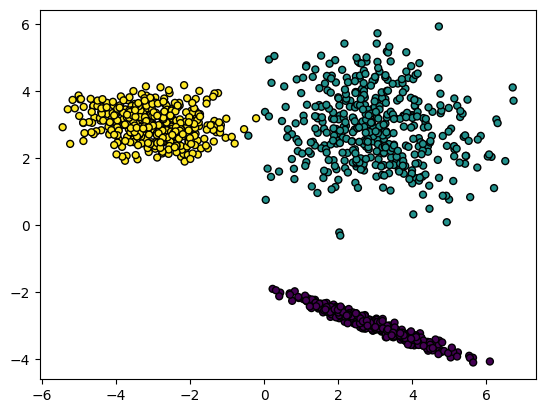

In [151]:
data3, data3_y = make_classification(n_samples=1300, n_classes=3, n_features=2, n_informative=2, 
                           n_redundant=0, class_sep = 3,random_state=0,
                           flip_y=0, n_clusters_per_class=1)
plt.scatter(data3[:, 0], data3[:, 1], marker="o", c=data3_y, s=25, edgecolor="k")
plt.show()

## Kmeans

датасет 1

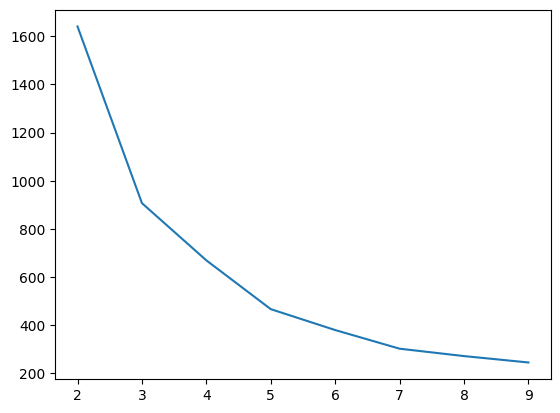

In [152]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data1)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

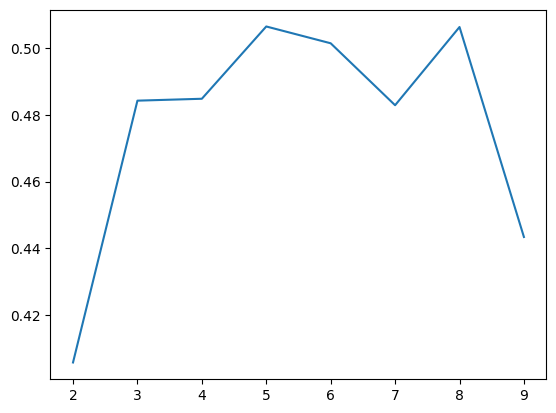

In [153]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data1, KMeans(i, n_init='auto').fit(data1).labels_))

plt.plot(range(2,10), ss)

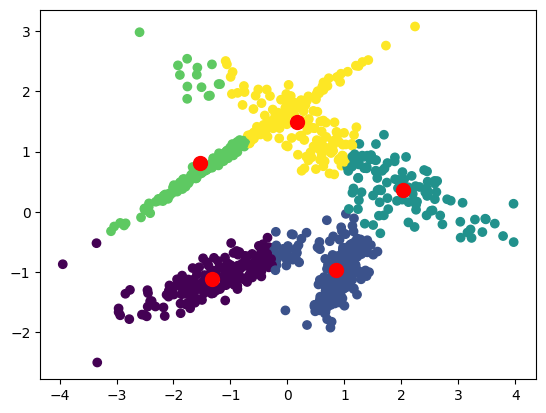

In [154]:

kmeans1 = KMeans(5, n_init='auto',algorithm= 'lloyd').fit(data1)
plt.scatter(data1[:,0], data1[:,1], c=kmeans1.labels_)
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c='red')

In [155]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score

print("ранд:", rand_score(kmeans1.labels_, data1_y))
print("индекс жаккара:", jaccard_score(kmeans1.labels_, data1_y, average = None),'\n')
print("силуэт:", silhouette_score(data1, kmeans1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, kmeans1.labels_))


ранд: 0.703374594303683
индекс жаккара: [0.38247863 0.00273598 0.         0.         0.        ] 

силуэт: 0.5046717817209659
индекс дэвида- болдуина: 0.6820594078393716


датасет 2

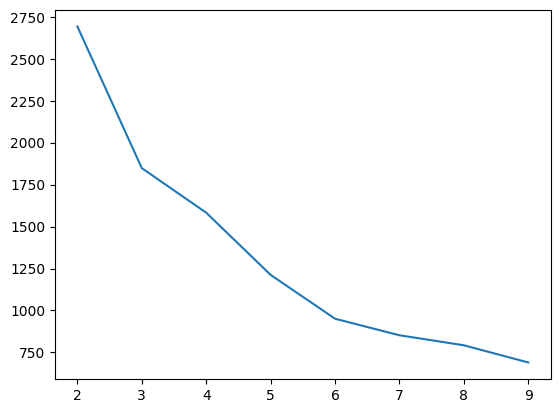

In [156]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data2)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

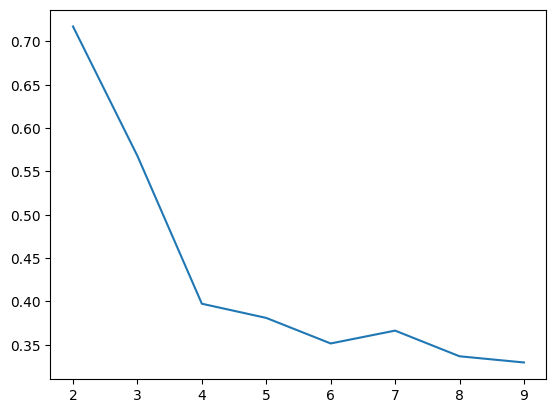

In [157]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data2, KMeans(i, n_init='auto').fit(data2).labels_))

plt.plot(range(2,10), ss)

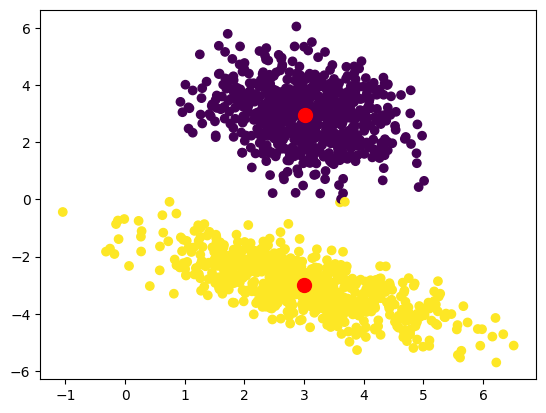

In [158]:
kmeans2 = KMeans(2, n_init='auto',algorithm= 'lloyd').fit(data2)
plt.scatter(data2[:,0], data2[:,1], c=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], s=100, c='red')

In [159]:
print("ранд:", rand_score(kmeans2.labels_, data2_y))
print("индекс жаккара:", jaccard_score(kmeans2.labels_, data2_y, average =None),'\n')
print("силуэт:", silhouette_score(data2, kmeans2.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, kmeans2.labels_))

ранд: 0.9900428877769836
индекс жаккара: [0.00143369 0.00357654] 

силуэт: 0.7172226880680346
индекс дэвида- болдуина: 0.39878816898040614


 датасет 3

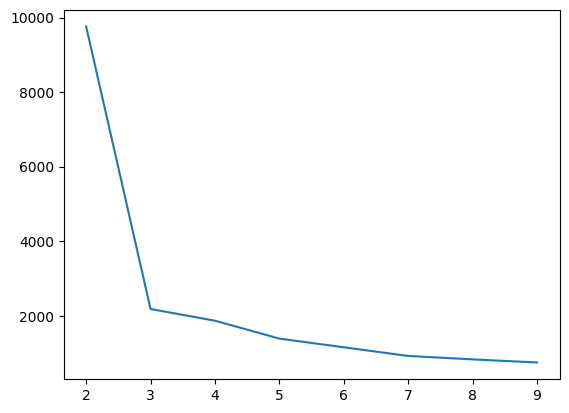

In [160]:
inertias = []

for i in range(2, 10):
  m = KMeans(i, n_init='auto').fit(data3)
  inertias.append(m.inertia_)

plt.plot(range(2,10), inertias)

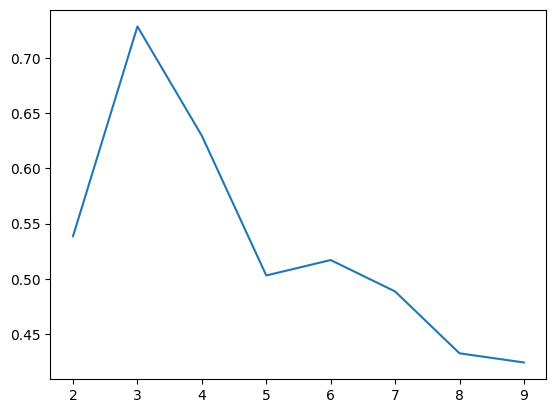

In [161]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(data3, KMeans(i, n_init='auto').fit(data3).labels_))

plt.plot(range(2,10), ss)

ранд: 0.9959092793272932
индекс жаккара: [0.         0.00230947 0.        ] 

силуэт: 0.7283184383523338
индекс дэвида- болдуина: 0.39785867495357236


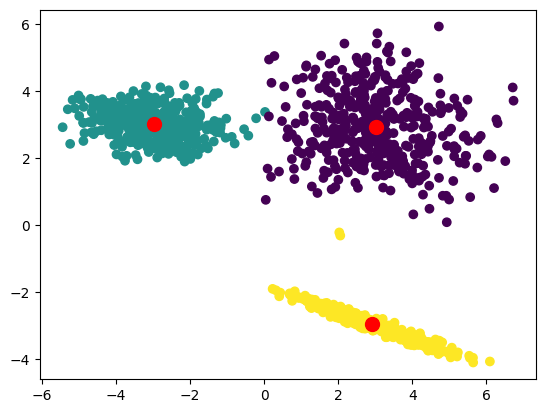

In [162]:
kmeans3 = KMeans(3, n_init='auto',algorithm= 'lloyd').fit(data3)


plt.scatter(data3[:,0], data3[:,1], c=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], s=100, c='red')


print("ранд:", rand_score(kmeans3.labels_, data3_y))
print("индекс жаккара:", jaccard_score(kmeans3.labels_, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, kmeans3.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, kmeans3.labels_))

## DB-SCAN

In [163]:
from sklearn.cluster import DBSCAN
import numpy as np


датасет 1

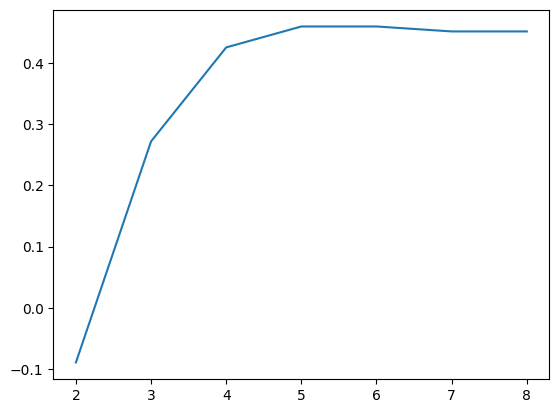

In [164]:
ss = []

for i in range(2, 9):
  epselon=i/10
  ss.append(silhouette_score(data1, DBSCAN(eps=epselon, min_samples=4).fit(data1).labels_))

plt.plot(range(2,9), ss)

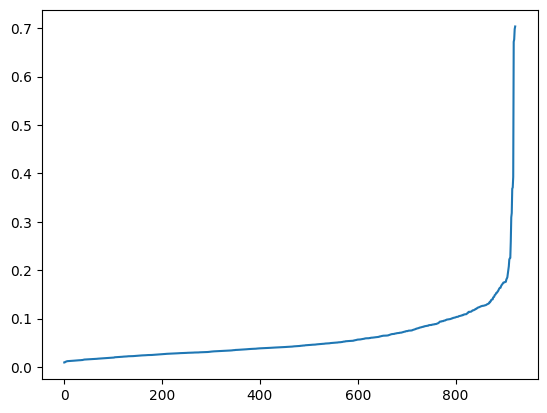

In [208]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data1)
distances, indices = nbrs.kneighbors(data1)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

[-1  0]
ранд: 0.4995052913845496
индекс жаккара: [0.         0.50326087 0.        ] 

силуэт: 0.45940212429979105
индекс дэвида- болдуина: 2.4401996683018856


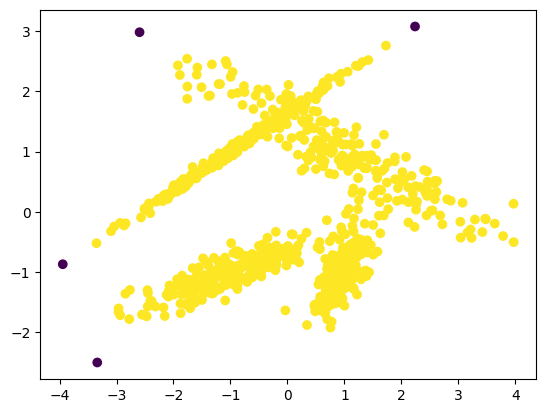

In [210]:

dbscan1 = DBSCAN(eps=0.5, min_samples=4).fit(data1)

print(np.unique(dbscan1.labels_))
plt.scatter(data1[:,0], data1[:,1], c=dbscan1.labels_)

print("ранд:", rand_score(dbscan1.labels_, data1_y))
print("индекс жаккара:", jaccard_score(dbscan1.labels_, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, dbscan1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, dbscan1.labels_))


датасет 2

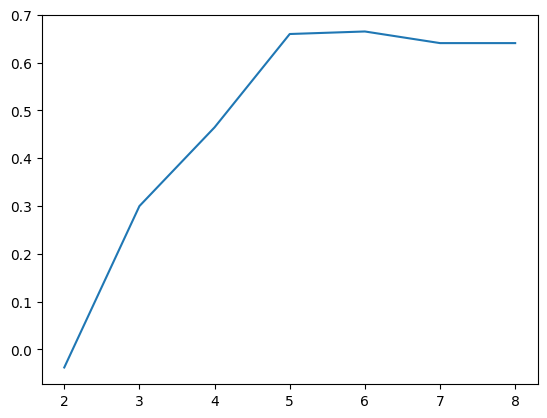

In [166]:
ss = []

for i in range(2, 9):
  epselon=i/10
  ss.append(silhouette_score(data2, DBSCAN(eps=epselon, min_samples=4).fit(data2).labels_))

plt.plot(range(2,9), ss)

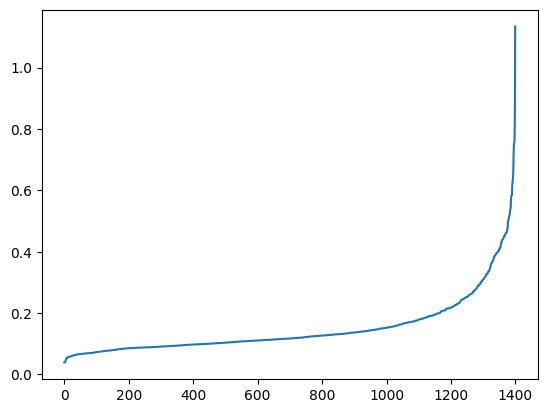

In [211]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(data2)
distances, indices = nbrs.kneighbors(data2)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

[-1  0  1]
ранд: 0.9886286122740733
индекс жаккара: [0.         0.98860399 0.9886202 ] 

силуэт: 0.6596759007914537
индекс дэвида- болдуина: 1.8666151020136086


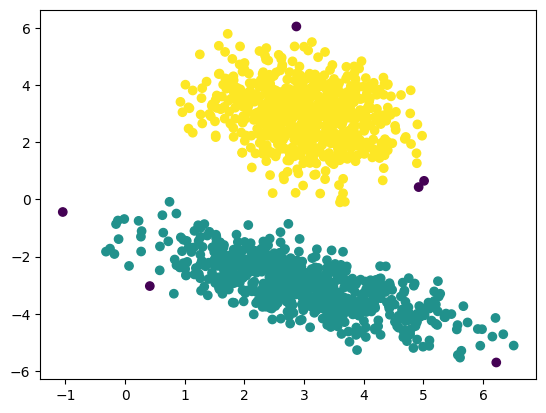

In [207]:

dbscan2 = DBSCAN(eps=0.5, min_samples=4).fit(data2)

print(np.unique(dbscan2.labels_))
plt.scatter(data2[:,0], data2[:,1], c=dbscan2.labels_)

print("ранд:", rand_score(dbscan2.labels_, data2_y))
print("индекс жаккара:", jaccard_score(dbscan2.labels_, data2_y, average= None),'\n')
print("силуэт:", silhouette_score(data2, dbscan2.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, dbscan2.labels_))

датасет 3

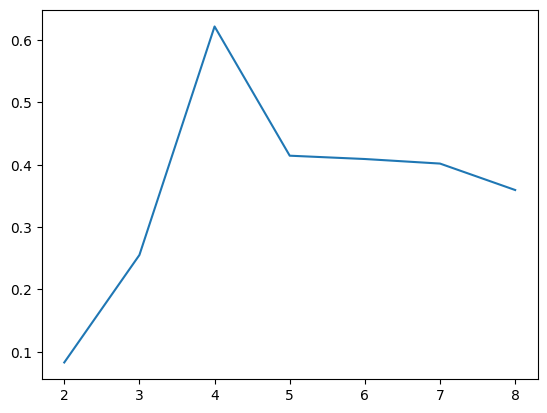

In [168]:
ss = []

for i in range(2, 9):
  epselon=i/10
  ss.append(silhouette_score(data3, DBSCAN(eps=epselon, min_samples=4).fit(data3).labels_))

plt.plot(range(2,9), ss)

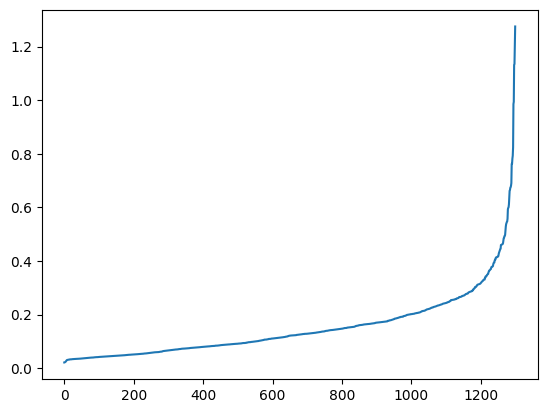

In [215]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=9).fit(data3)
distances, indices = nbrs.kneighbors(data3)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

[-1  0  1  2  3]
ранд: 0.9811665778409427
индекс жаккара: [0. 0. 0. 0. 0.] 

силуэт: 0.6218595357476945
индекс дэвида- болдуина: 2.9705046870151453


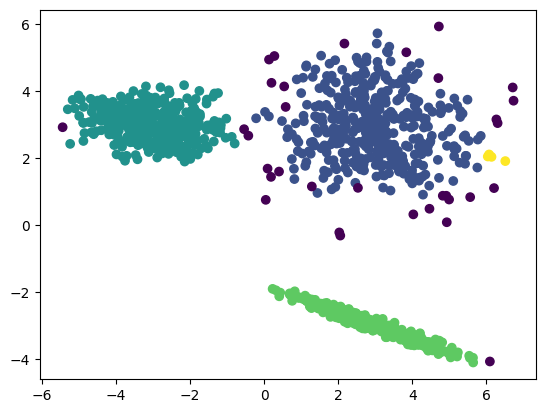

In [214]:

dbscan3 = DBSCAN(eps=0.40, min_samples=4).fit(data3)

print(np.unique(dbscan3.labels_))
plt.scatter(data3[:,0], data3[:,1], c=dbscan3.labels_)

print("ранд:", rand_score(dbscan3.labels_, data3_y))
print("индекс жаккара:", jaccard_score(dbscan3.labels_, data3_y, average= None),'\n')
print("силуэт:", silhouette_score(data3, dbscan3.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, dbscan3.labels_))

## Иерархическая кластеризация

In [170]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

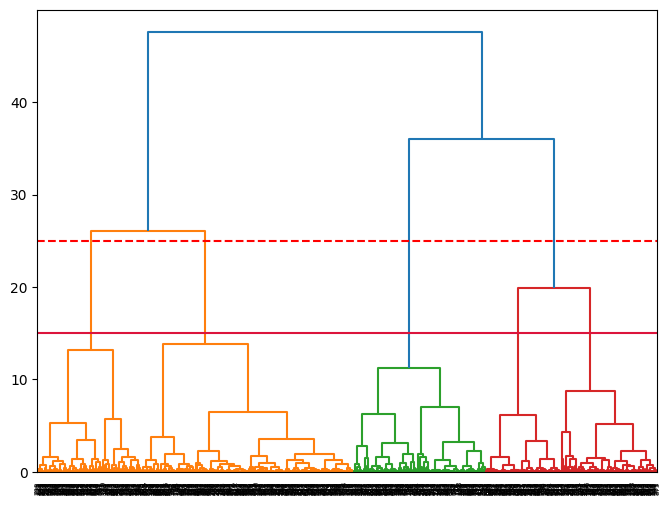

In [171]:
clusters = hierarchy.linkage(data1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');


ранд: 0.5793331656886085
индекс жаккара: [0.53278689 0.2020202  0.        ] 

силуэт: 0.4123406308338327
индекс дэвида- болдуина: 0.762942436591303


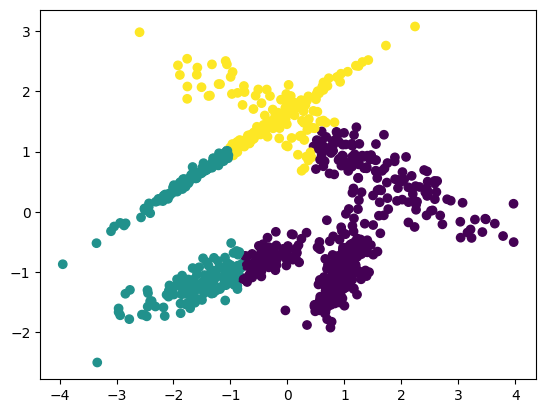

In [172]:

clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data1)

plt.scatter(data1[:,0], data1[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data1_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, clustering.labels_))

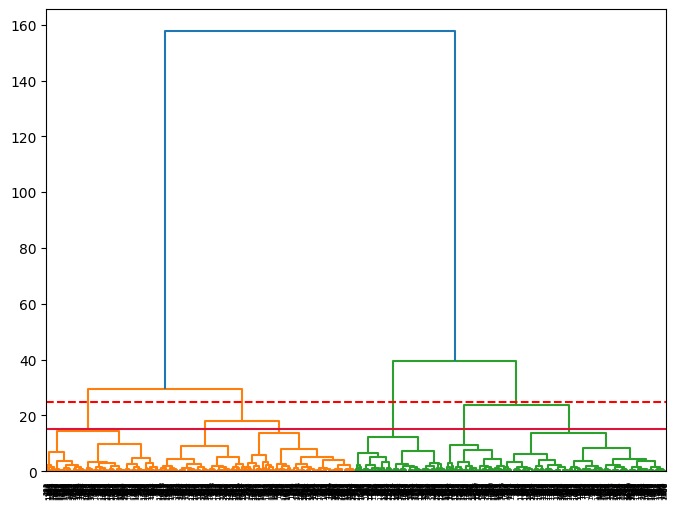

In [173]:
clusters = hierarchy.linkage(data2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

ранд: 0.9928775656080874
индекс жаккара: [0.99287749 0.99288762] 

силуэт: 0.7172478588612272
индекс дэвида- болдуина: 0.39897149666500126


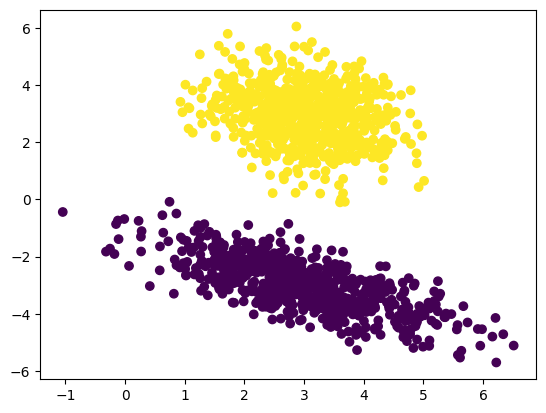

In [174]:
clustering = AgglomerativeClustering(n_clusters=2, linkage="ward").fit(data2)

plt.scatter(data2[:,0], data2[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data2_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data2_y, average= None),'\n')
print("силуэт:", silhouette_score(data2, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data2, clustering.labels_))

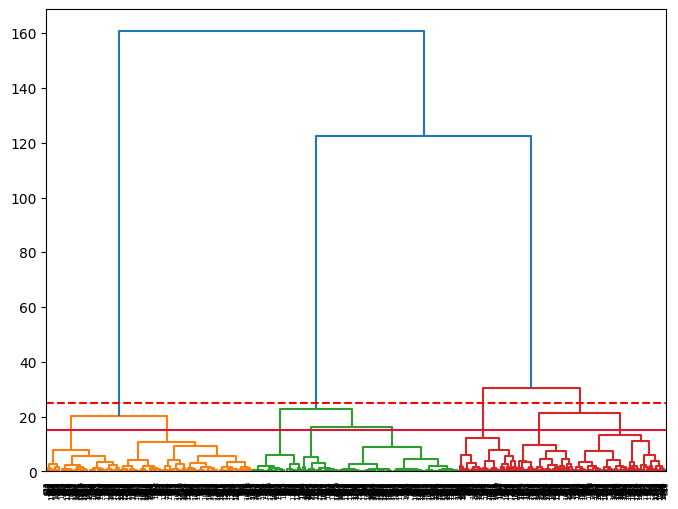

In [175]:
clusters = hierarchy.linkage(data3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

ранд: 0.9979534553206608
индекс жаккара: 0.00038476337052712584 

силуэт: 0.7275325319078786
индекс дэвида- болдуина: 0.3990951819629749


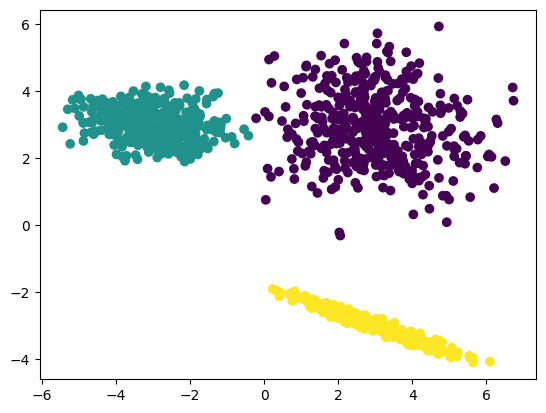

In [176]:
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(data3)

plt.scatter(data3[:,0], data3[:,1], c=clustering.labels_)

print("ранд:", rand_score(clustering.labels_, data3_y))
print("индекс жаккара:", jaccard_score(clustering.labels_, data3_y, average= "micro"),'\n')
print("силуэт:", silhouette_score(data3, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(data3, clustering.labels_))

## Задание 2

In [177]:
import pandas as pd

from sklearn. preprocessing import OneHotEncoder


In [178]:
data=pd.read_csv("../data/weatherAUS.csv")
data.dropna(inplace=True,ignore_index=True)
f = lambda x : str(x)[5:7]
data['Date'] = data['Date'].transform(f)
data['Date'] = data['Date'].astype(int)
f = lambda x : 0 if (x == "No") else 1
data['RainToday'] = data['RainToday'].transform(f)
data['RainToday'] = data['RainToday'].astype(int)

data['RainTomorrow'] = data['RainTomorrow'].transform(f)
data['RainTomorrow'] = data['RainTomorrow'].astype(int)
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_encoder = OneHotEncoder(sparse_output=False)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('cat', categorical_encoder, categorical_features)
     ])
# Получите закодированные функции в виде DataFrame.
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(data)
encoded_features.head()
data=data.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1)
df = pd.concat([
    data,
    encoded_features
], axis=1)
df_major_0 = df[df["RainTomorrow"] == 0]
df_minor_1 = df[df["RainTomorrow"] == 1]

df_major_0_undersampled = df_major_0.sample(len(df_minor_1))

dataclass = pd.concat([df_major_0_undersampled, df_minor_1], axis=0)

x_class=dataclass.drop(['RainTomorrow'],axis=1)
y_class=dataclass['RainTomorrow']


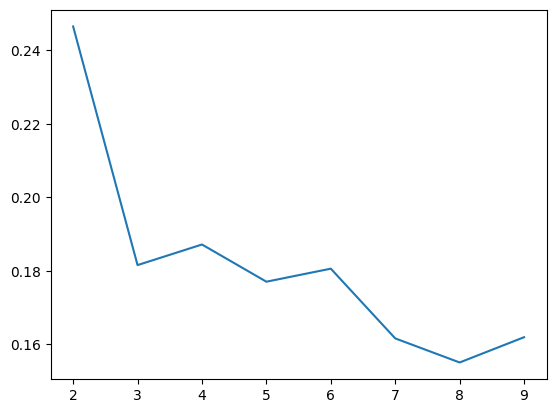

In [179]:
ss = []

for i in range(2, 10):
  ss.append(silhouette_score(x_class, KMeans(i, n_init='auto').fit(x_class).labels_))

plt.plot(range(2,10), ss)

In [180]:
kmeans = KMeans(2, n_init='auto',algorithm= 'elkan').fit(x_class)

print("ранд:", rand_score(kmeans.labels_, y_class))
print("индекс жаккара:", jaccard_score(kmeans.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, kmeans.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, kmeans.labels_))

ранд: 0.5862894872789477
индекс жаккара: [0.2112815  0.12670043] 

силуэт: 0.24652749937435747
индекс дэвида- болдуина: 1.4525359985179191


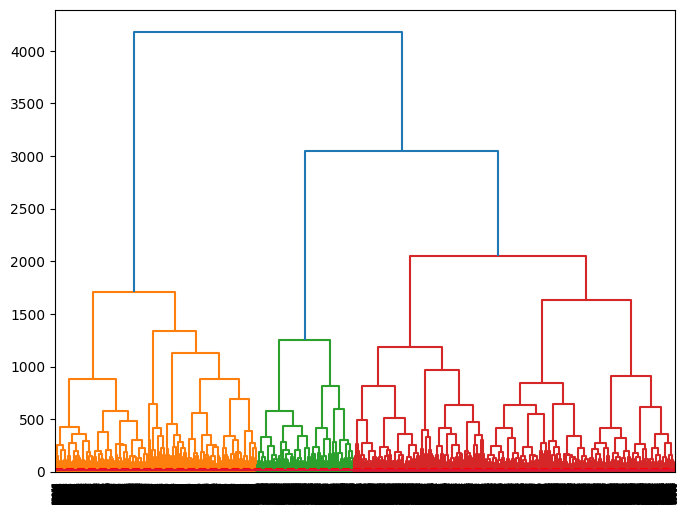

In [181]:
clusters = hierarchy.linkage(x_class, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
plt.axhline(25, color='red', linestyle='--');
plt.axhline(15, color='crimson');

In [184]:
clustering= AgglomerativeClustering(n_clusters=3,linkage="ward").fit(x_class)


print("ранд:", rand_score(clustering.labels_, y_class))
print("индекс жаккара:", jaccard_score(clustering.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, clustering.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, clustering.labels_))

ранд: 0.5652792390447592
индекс жаккара: [0.43725134 0.47858017 0.        ] 

силуэт: 0.15078854153849372
индекс дэвида- болдуина: 1.797096040142866


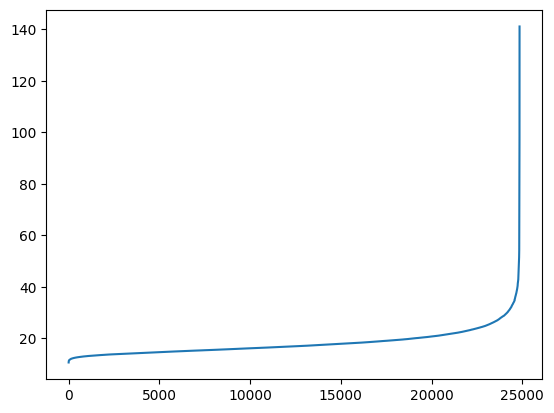

In [192]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=180).fit(x_class)
distances, indices = nbrs.kneighbors(x_class)
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

In [193]:
dbscan1 = DBSCAN(eps=30, min_samples=180).fit(x_class)

print(dbscan1.labels_)
print("ранд:", rand_score(dbscan1.labels_, y_class))
print("индекс жаккара:", jaccard_score(dbscan1.labels_, y_class, average= None),'\n')
print("силуэт:", silhouette_score(x_class, dbscan1.labels_))
print("индекс дэвида- болдуина:", davies_bouldin_score(x_class, dbscan1.labels_))

[0 0 0 ... 0 0 0]
ранд: 0.5000227020889104
индекс жаккара: [0.         0.50178051 0.        ] 

силуэт: 0.4497407225558443
индекс дэвида- болдуина: 1.8913381321027265


## Kmeans

In [ ]:
class KMeans:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
    
    def _euclidean_distance(self, centroid, dots):
        return np.sqrt(np.sum((centroid[:, np.newaxis] - dots) ** 2, axis=2))
    
    def _update_centroids(self, data):
        distances = self._euclidean_distance(data, self.centroids)
          
        clasters = np.argmin(distances, axis=1)
            
        return np.array([np.mean(data[clasters == i], axis=0) for i in range(self.n_clusters)])

    def fit(self, data):
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iterations):
            new_centroids = self._update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids
            
    def predict(self, data):
        distances = self._euclidean_distance(data, self.centroids)
        return np.argmin(distances, axis=1)




ранд: 0.5135733473089497
индекс жаккара: [0.41552511 0.40923077] 

силуэт: 0.40596462823232277
индекс дэвида- болдуина: 1.0746204465679847


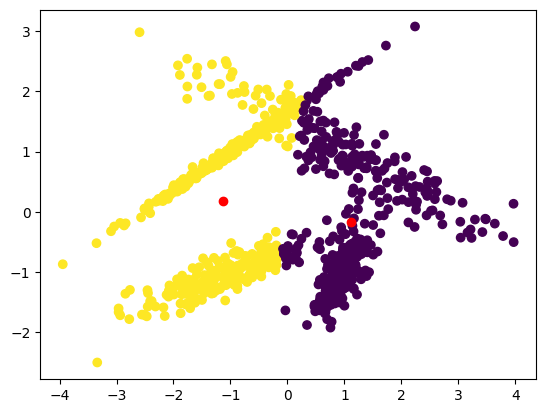

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data1)
pred = kmeans.predict(data1)

plt.scatter(data1[:,0], data1[:,1], c= pred)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='r')


print("ранд:", rand_score(pred, data1_y))
print("индекс жаккара:", jaccard_score(pred, data1_y, average= None),'\n')
print("силуэт:", silhouette_score(data1, pred))
print("индекс дэвида- болдуина:", davies_bouldin_score(data1, pred))